# Programming - Assignment 2 DDA3020
## Question 1

### Library Setup and Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Check data
(penguins.head())


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
# Set Random Seed for reproducibility of notebook
RANDOM_SEED = 3020

In [3]:
penguins["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Data Preprocessing
- removing all `Nan` or `Null` entries in datapoints

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ignore warnings for output clarity
import warnings
warnings.filterwarnings('ignore')

# Check for incomplete data points and delete them
initial_size = penguins.shape[0]
penguins_cleaned = penguins.dropna()  # Remove rows with any NaN values
cleaned_size = penguins_cleaned.shape[0]

# Initialize LabelEncoders for each categorical feature: species, island, sex
species_encoder = LabelEncoder()
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

# Fit and transform the categorical features
penguins_cleaned['species'] = species_encoder.fit_transform(penguins_cleaned['species'])
penguins_cleaned['island'] = island_encoder.fit_transform(penguins_cleaned['island'])
penguins_cleaned['sex'] = sex_encoder.fit_transform(penguins_cleaned['sex'])

# Define features and target variable
X = penguins_cleaned.drop(columns=['species'])
y = penguins_cleaned['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

# Print sizes before and after preprocessing
print("Q2.1.1 Data Preprocessing:")
print(f"Number of data points in the whole dataset originally: {initial_size}")
print(f"Number of data points in the whole dataset after deleting incomplete data: {cleaned_size}")
print(f"Number of data points in the training set after splitting: {X_train.shape[0]}")
print(f"Number of data points in the test set after splitting: {X_test.shape[0]}")

Q2.1.1 Data Preprocessing:
Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset after deleting incomplete data: 333
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


### Data Statistics
- Explore distribution of classes for each feature

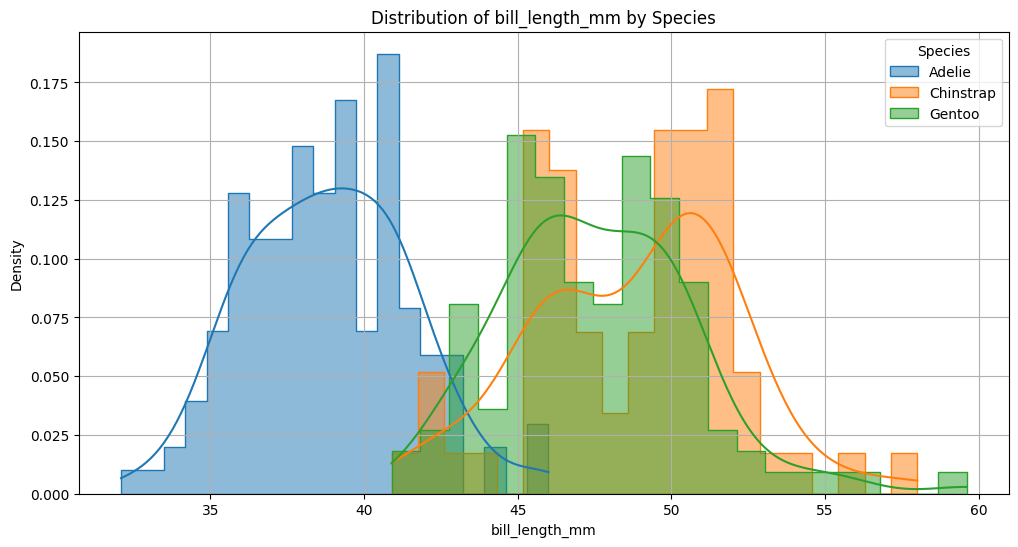

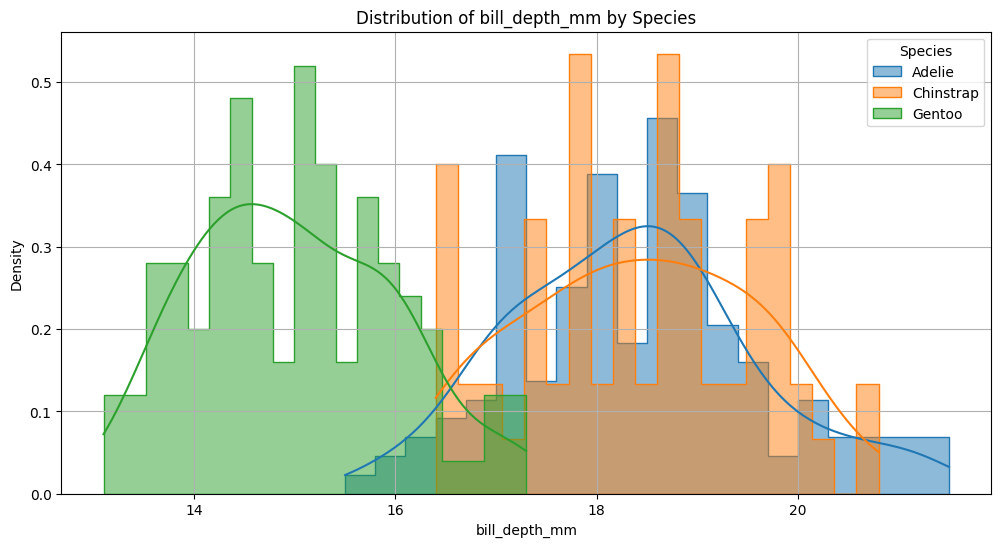

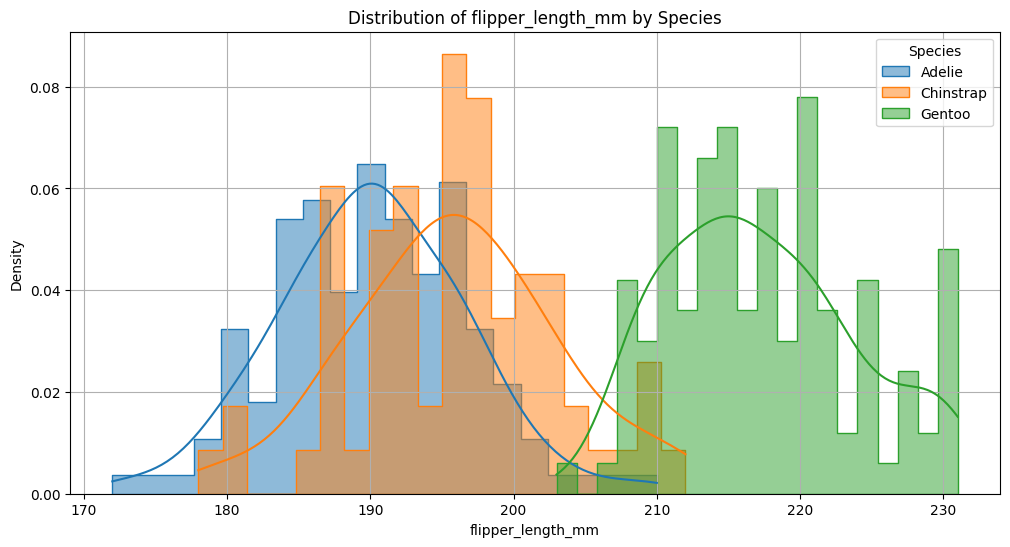

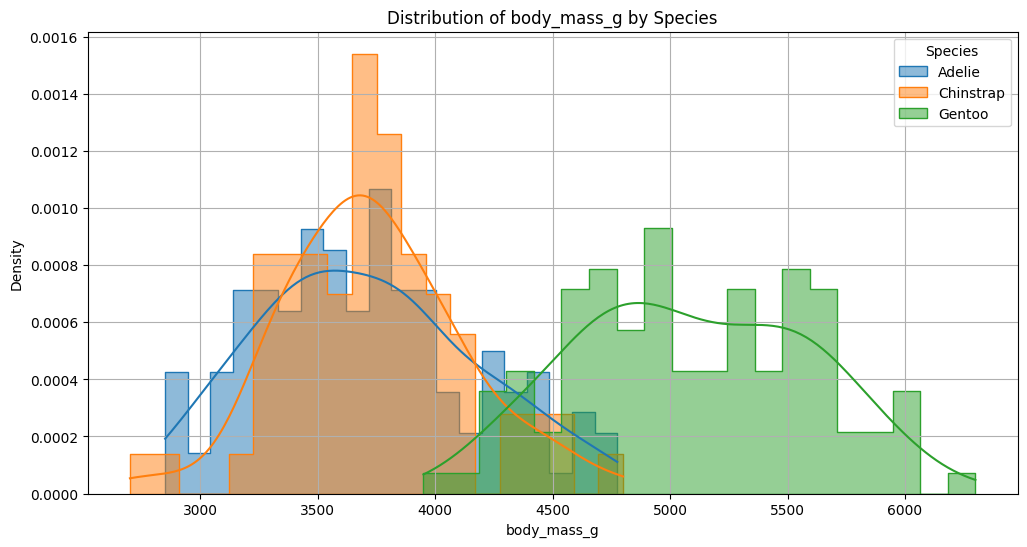

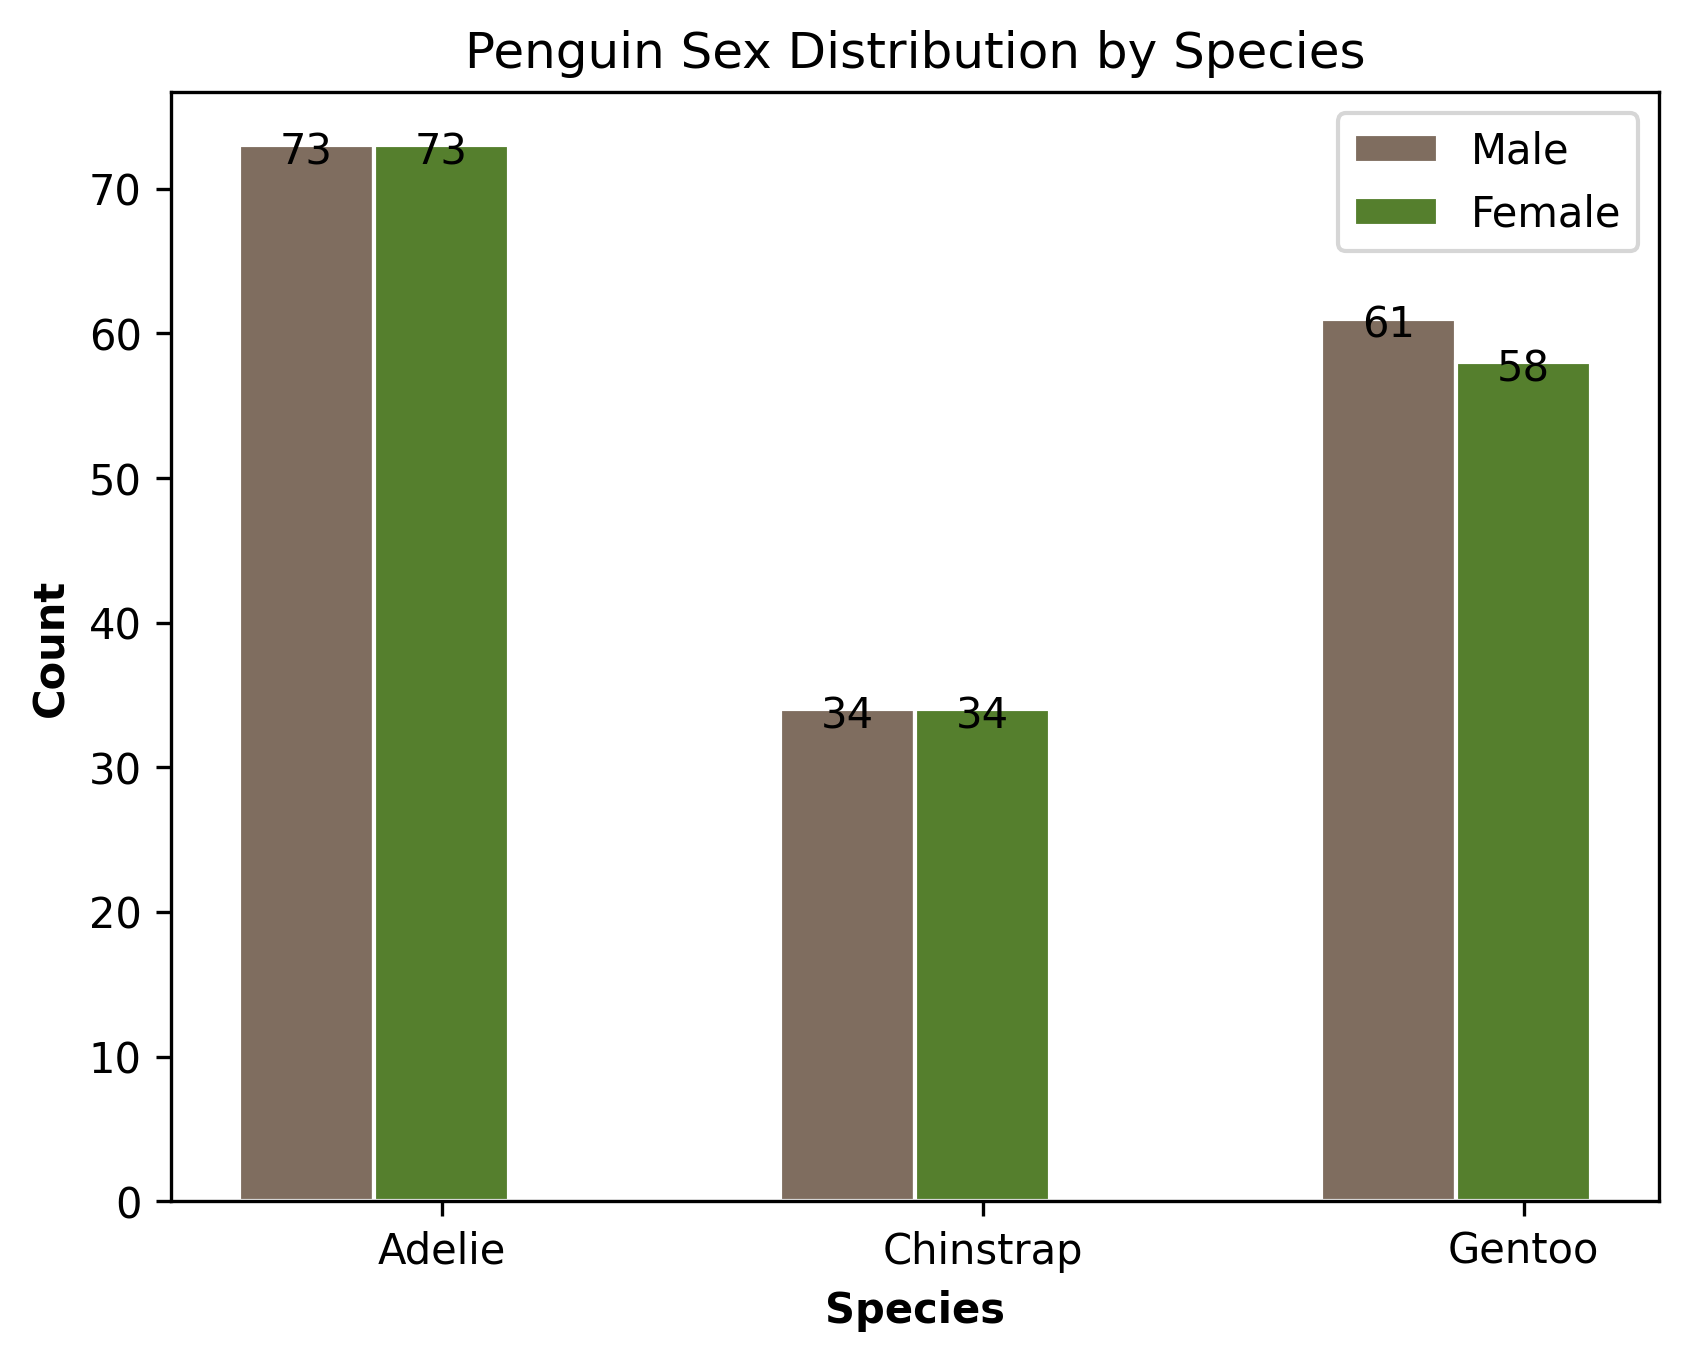

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


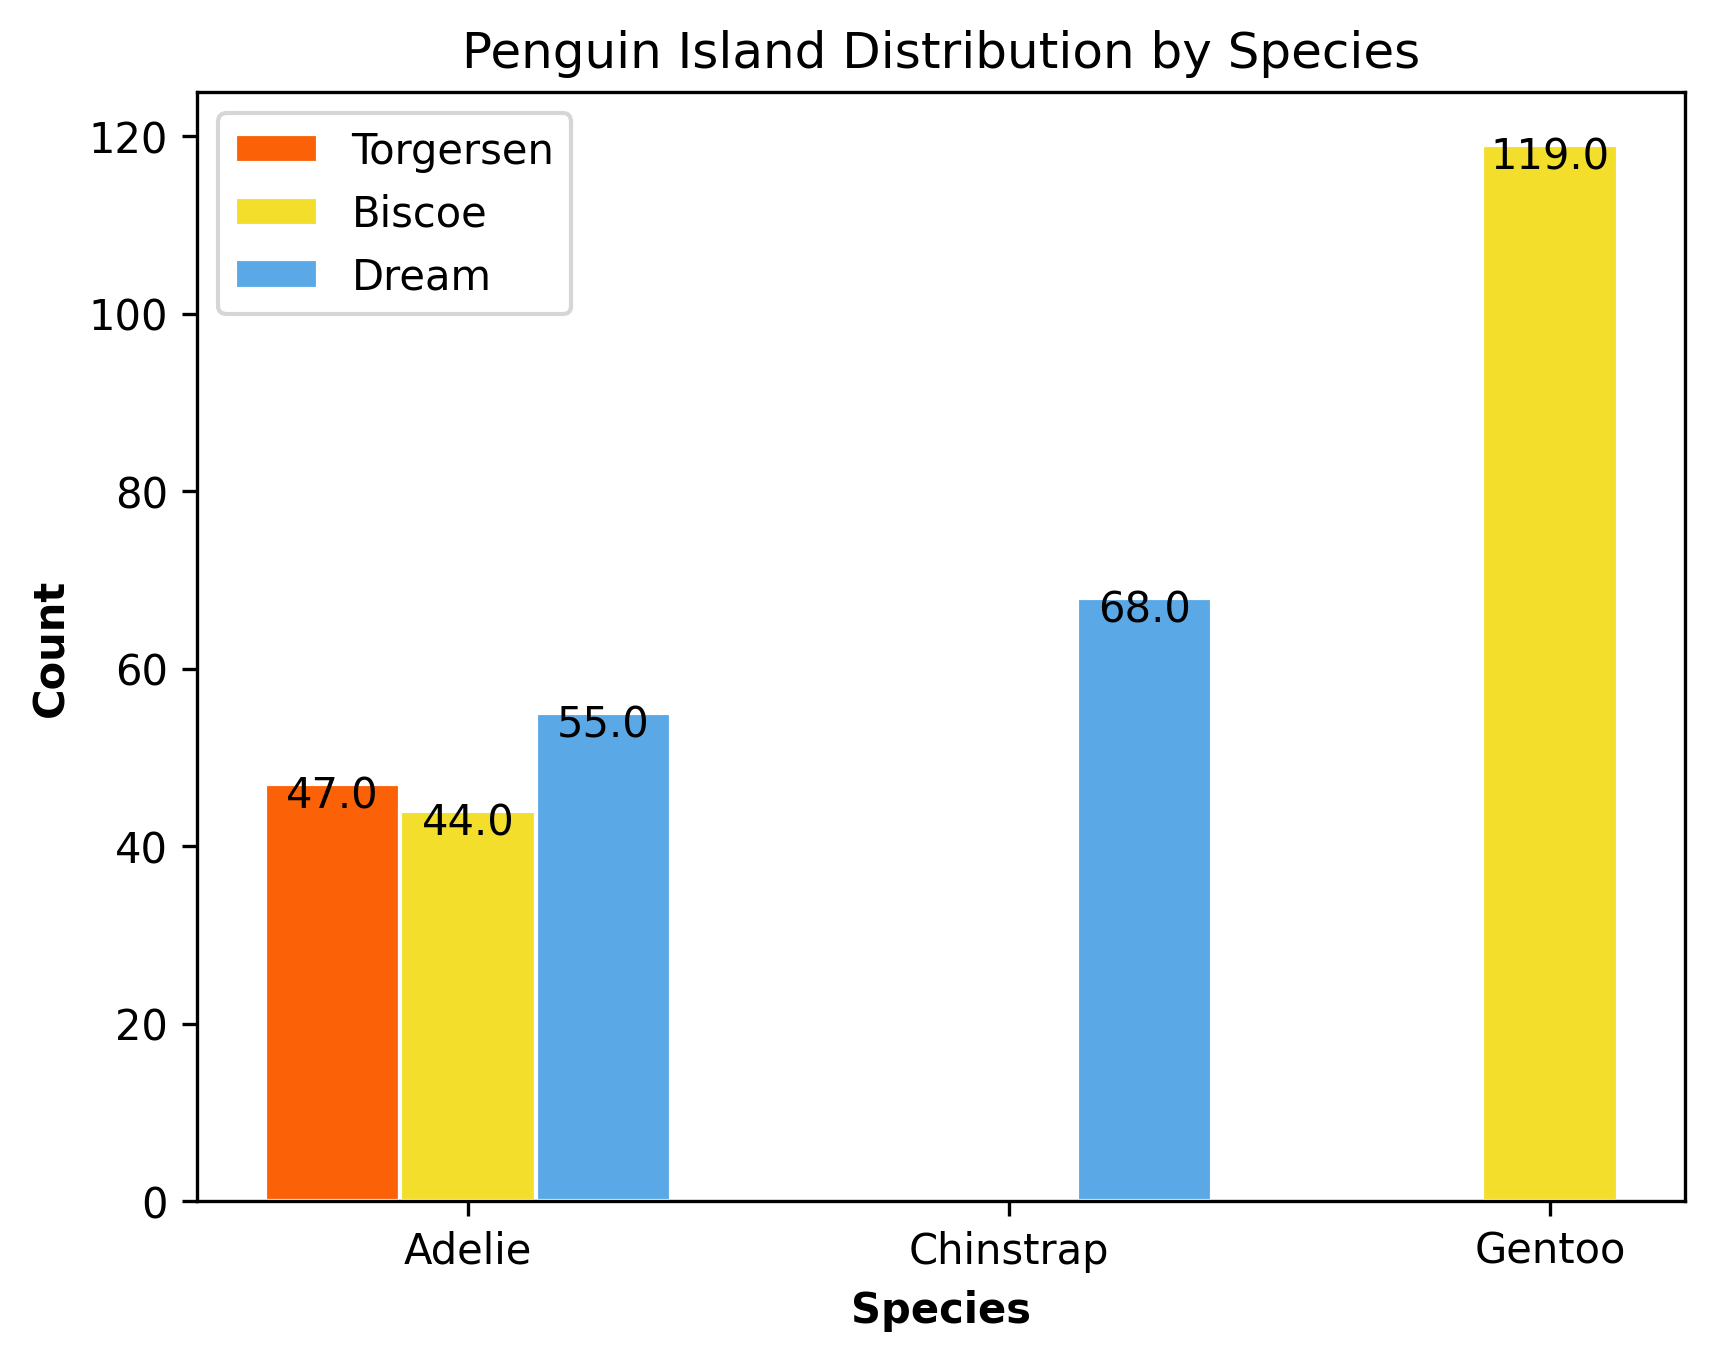

In [5]:
# Define numerical features and the target variable
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target_variable = 'species'

# Create histogram plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(12, 6))
    
    # Create subplots for each species
    for species in penguins_cleaned[target_variable].unique():
        subset = penguins_cleaned[penguins_cleaned[target_variable] == species]
        sns.histplot(subset[feature], bins=20, kde=True, label=species_encoder.inverse_transform([species])[0], stat="density", element="step")

    plt.title(f'Distribution of {feature} by Species')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Species')
    plt.grid(True)
    plt.show()

penguins_cleaned_uncoded = penguins.dropna()

### Plots for Categorical Features ###
# Group the data by species and island
grouped_by_island_uncoded = penguins_cleaned_uncoded.groupby(['species', 'island']).size().unstack(level=1).reset_index()

# Group the data by species and sex
grouped_by_sex_uncoded = penguins_cleaned_uncoded.groupby(['species', 'sex']).size().unstack(level=1).reset_index()

## Plot for the distribution of species by sex  ##
barWidth = 0.25
male_species = grouped_by_sex_uncoded.Male
female_species = grouped_by_sex_uncoded.Female

# Bar positions
r = np.arange(len(male_species))
r2 = r + barWidth

# Plotting
fig, ax = plt.subplots(dpi=300)
ax.bar(r, male_species, color='#7f6d5f', width=barWidth, edgecolor='white', label='Male')
ax.bar(r2, female_species, color='#557f2d', width=barWidth, edgecolor='white', label='Female')

# Xticks
ax.set_xlabel('Species', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(grouped_by_sex_uncoded['species'])
# Adding value labels on the bars
for i in range(len(r)):
    ax.text(r[i], male_species[i] + 1, str(male_species[i]), ha='center', va='top')
    ax.text(r2[i], female_species[i] + 1, str(female_species[i]), ha='center', va='top')

# Yticks
ax.set_ylabel('Count', fontweight='bold')

# Title
ax.set_title('Penguin Sex Distribution by Species')

# Legend and show
ax.legend()
plt.show()


## Plots for distribution of species by island ##
# Data
island_1_species = grouped_by_island_uncoded['Torgersen']
island_2_species = grouped_by_island_uncoded['Biscoe']
island_3_species = grouped_by_island_uncoded['Dream']

# Bar positions
r = np.arange(len(island_1_species))
r2 = r + barWidth
r3 = r2 + barWidth

# Plotting
fig, ax = plt.subplots(dpi=300)
ax.bar(r, island_1_species, color='#FB6107', width=barWidth, edgecolor='white', label='Torgersen')
ax.bar(r2, island_2_species, color='#F3DE2C', width=barWidth, edgecolor='white', label='Biscoe')
ax.bar(r3, island_3_species, color='#5AA9E6', width=barWidth, edgecolor='white', label='Dream')

# Xticks
ax.set_xlabel('Species', fontweight='bold')
ax.set_xticks(r + barWidth)
ax.set_xticklabels(grouped_by_island_uncoded['species'])
# Adding value labels on the bars
for i in range(len(r)):
    ax.text(r[i], island_1_species[i] + 1, str(island_1_species[i]), ha='center', va='top')
    ax.text(r2[i], island_2_species[i] + 1, str(island_2_species[i]), ha='center', va='top')
    ax.text(r3[i], island_3_species[i] + 1, str(island_3_species[i]), ha='center', va='top')

# Yticks
ax.set_ylabel('Count', fontweight='bold')

# Title
ax.set_title('Penguin Island Distribution by Species')

# Legend and show
ax.legend()
plt.show()

### Decision Trees

Q2.1.3 Decision Tree:
1. Results with max depth as 3 and least node size 1:
Training Accuracy: 0.9828, Test Accuracy: 0.9300


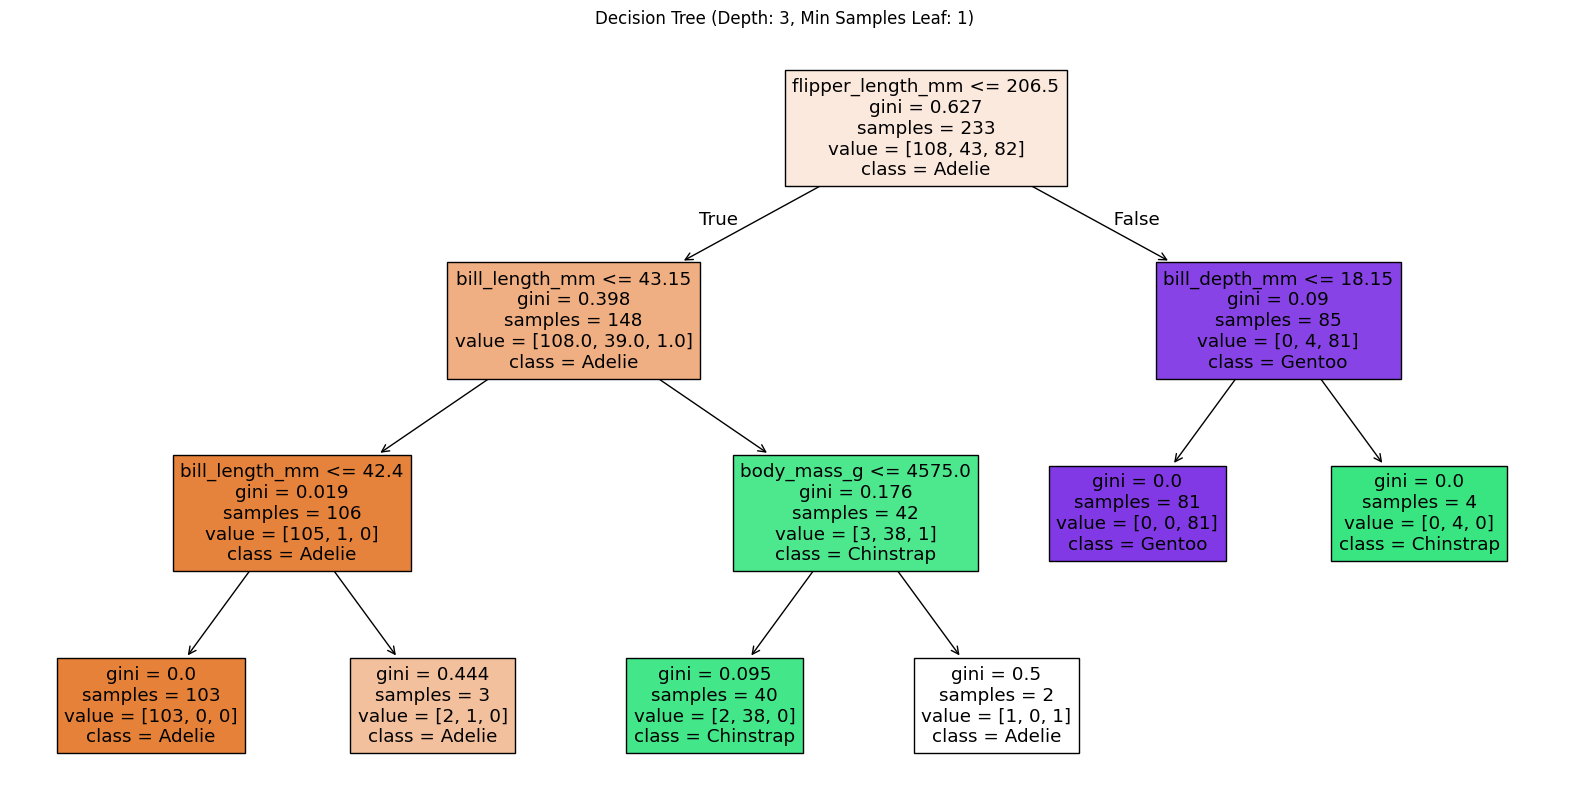

2. Results with max depth as 3 and least node size 5:
Training Accuracy: 0.9742, Test Accuracy: 0.9100


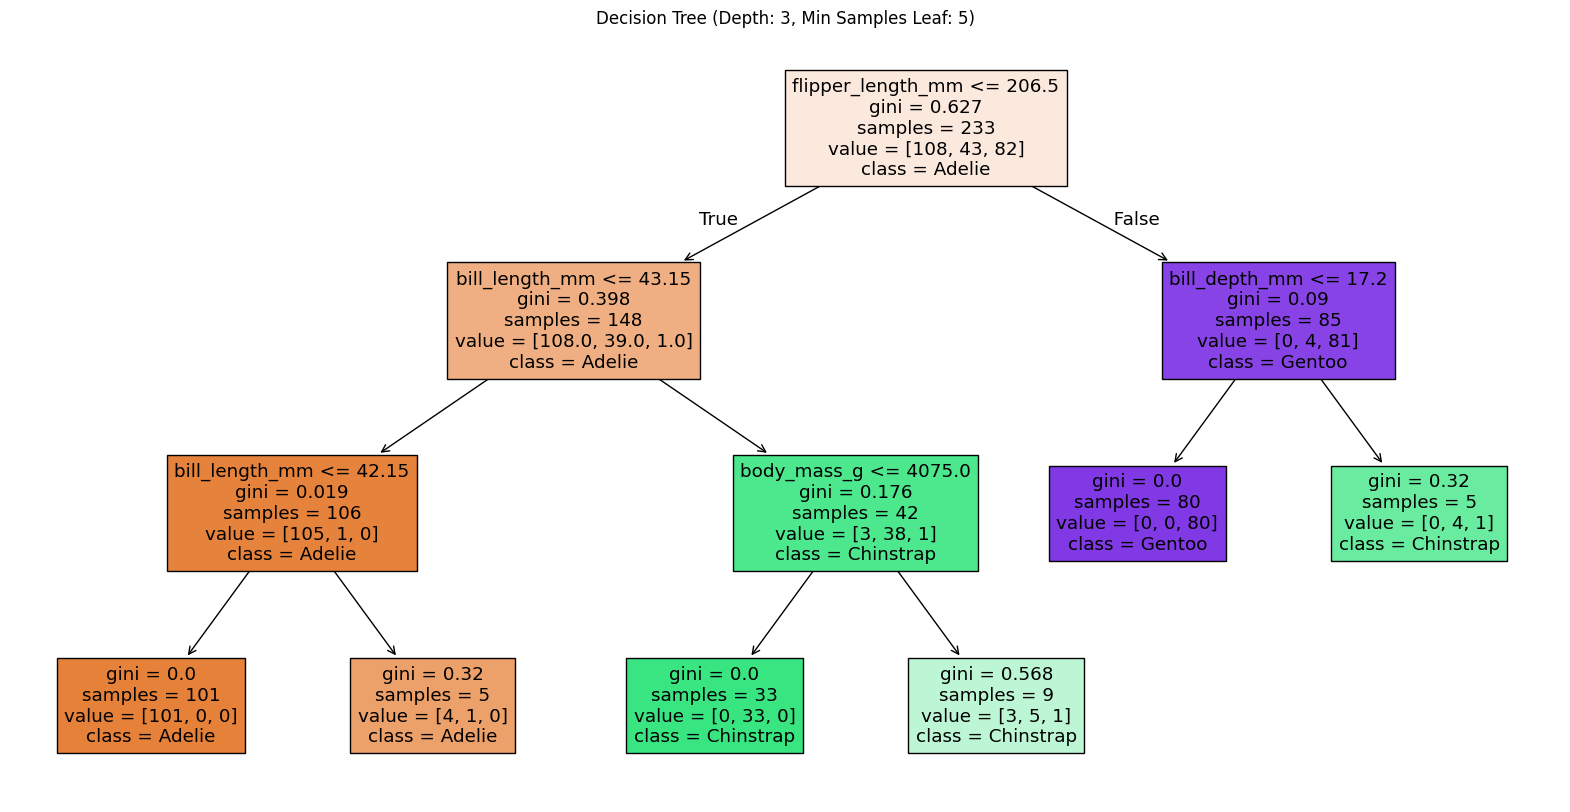

3. Results with max depth as 3 and least node size 10:
Training Accuracy: 0.9614, Test Accuracy: 0.9100


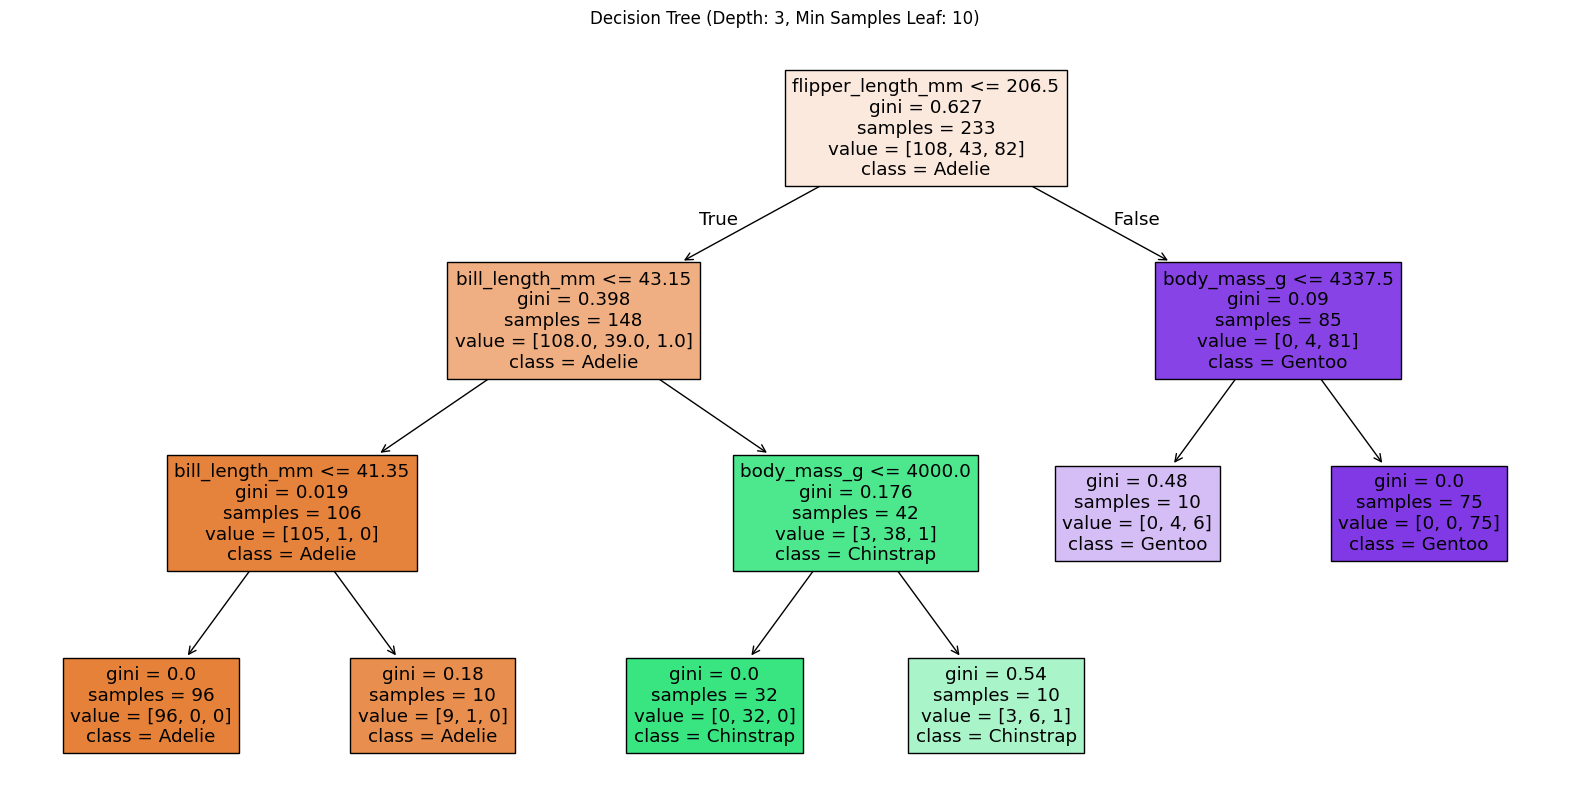

4. Results with max depth as 5 and least node size 1:
Training Accuracy: 0.9957, Test Accuracy: 0.9500


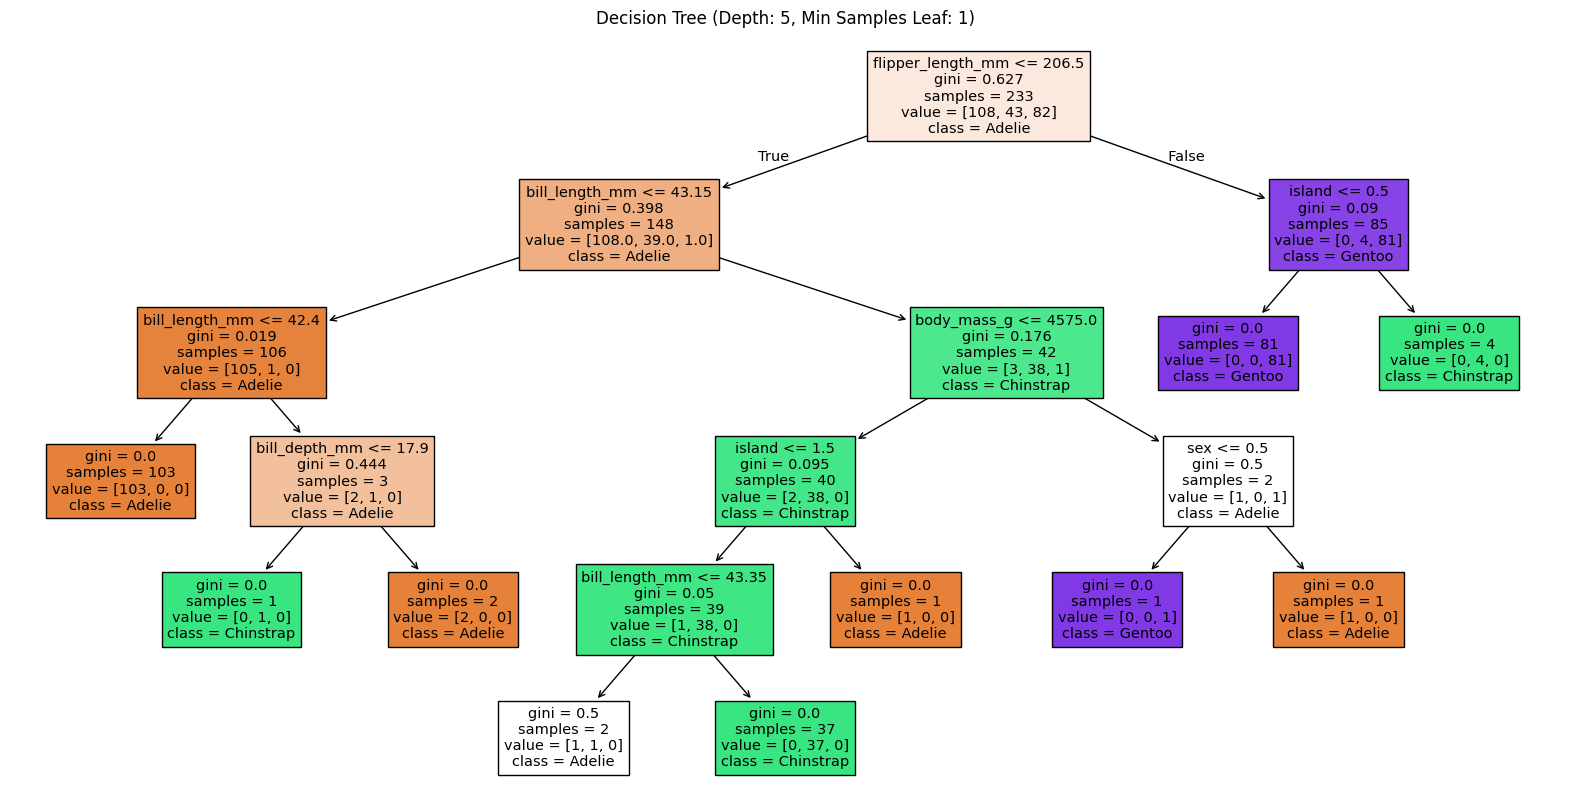

5. Results with max depth as 5 and least node size 5:
Training Accuracy: 0.9742, Test Accuracy: 0.9100


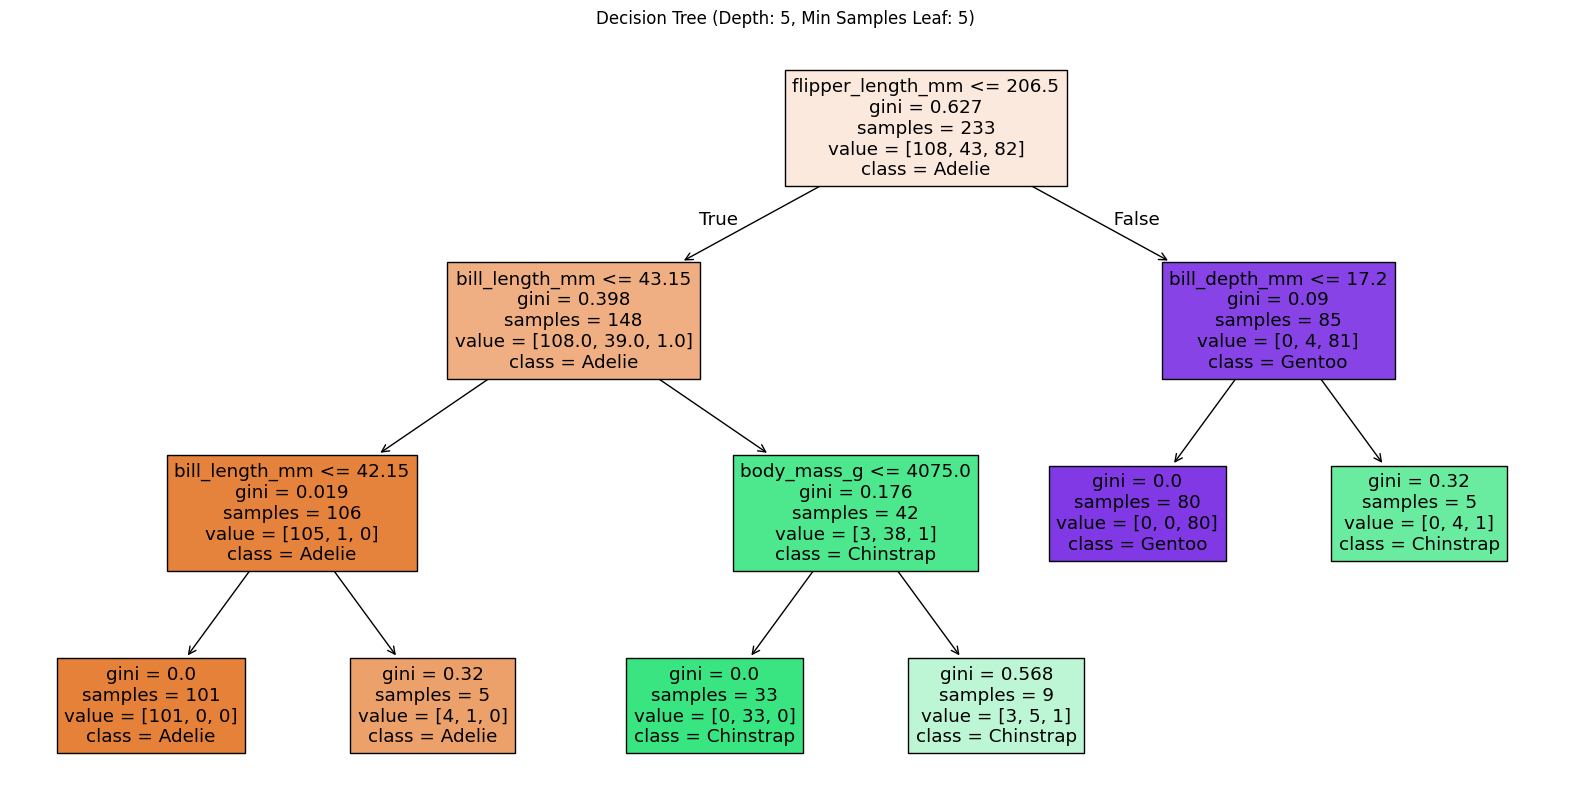

6. Results with max depth as 5 and least node size 10:
Training Accuracy: 0.9614, Test Accuracy: 0.9100


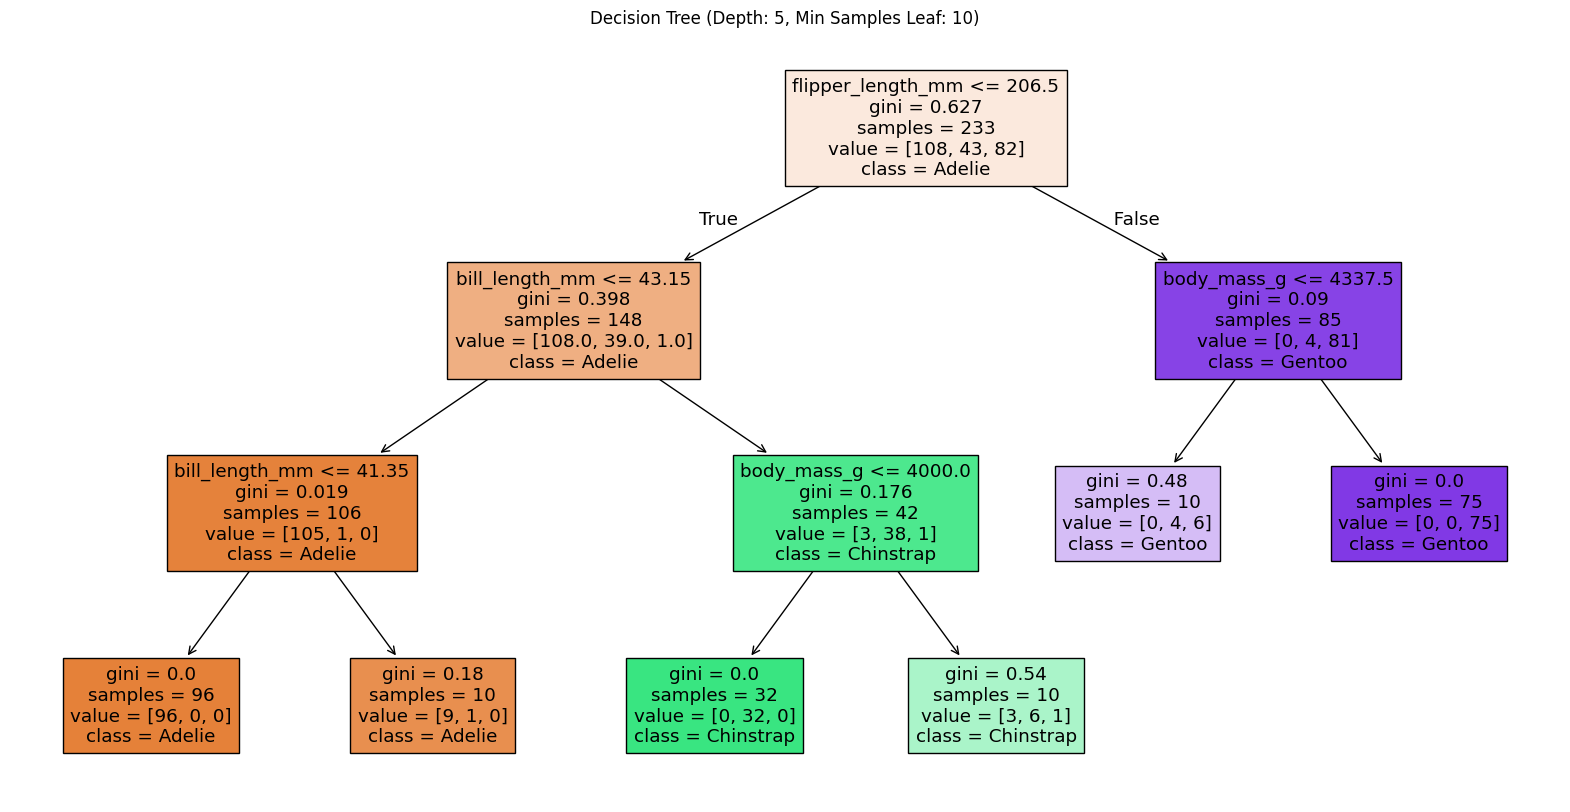

7. Results with max depth as 7 and least node size 1:
Training Accuracy: 1.0000, Test Accuracy: 0.9500


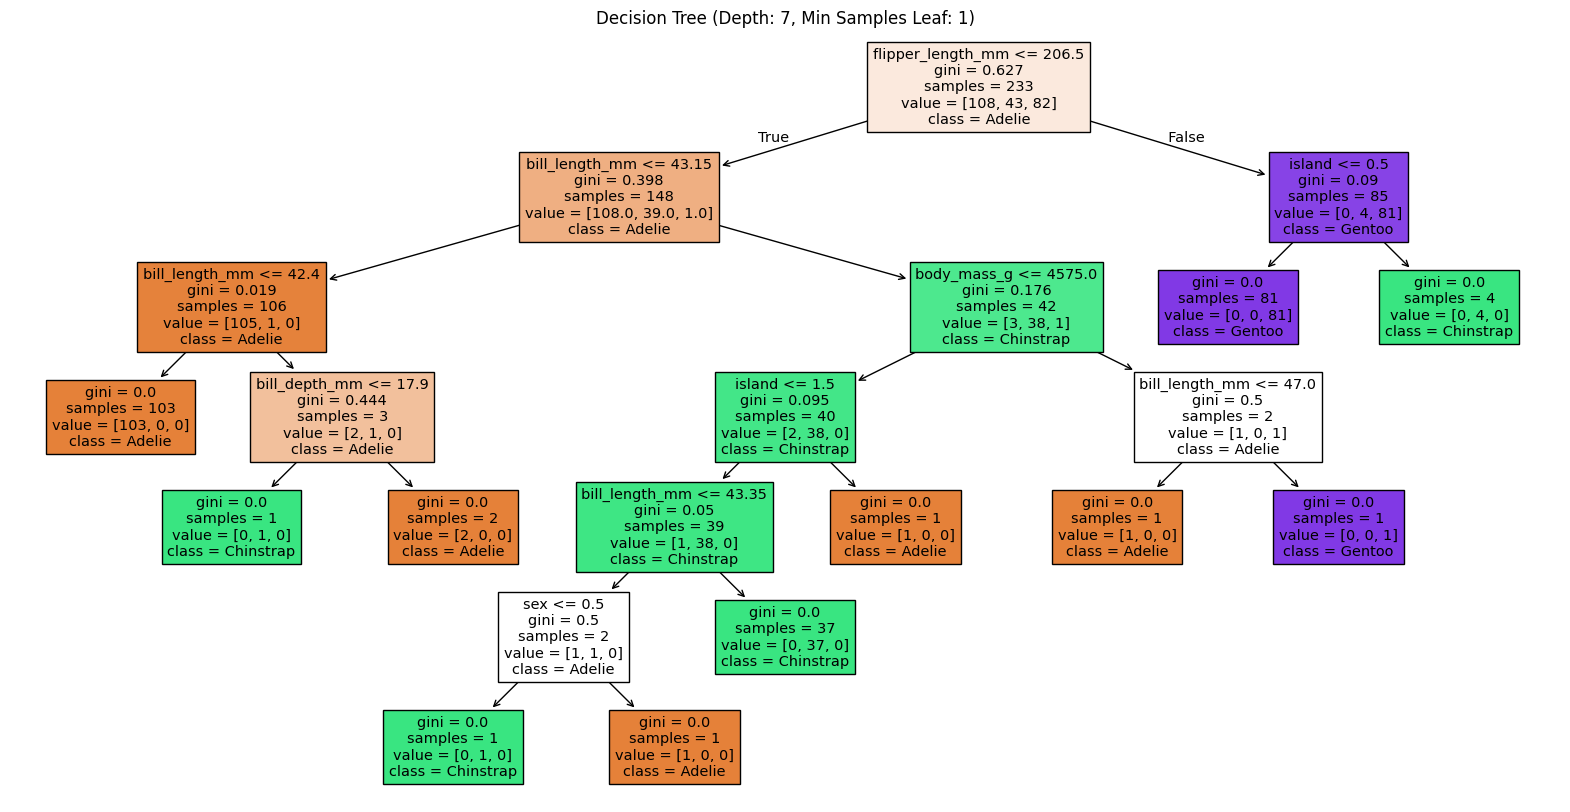

8. Results with max depth as 7 and least node size 5:
Training Accuracy: 0.9742, Test Accuracy: 0.9100


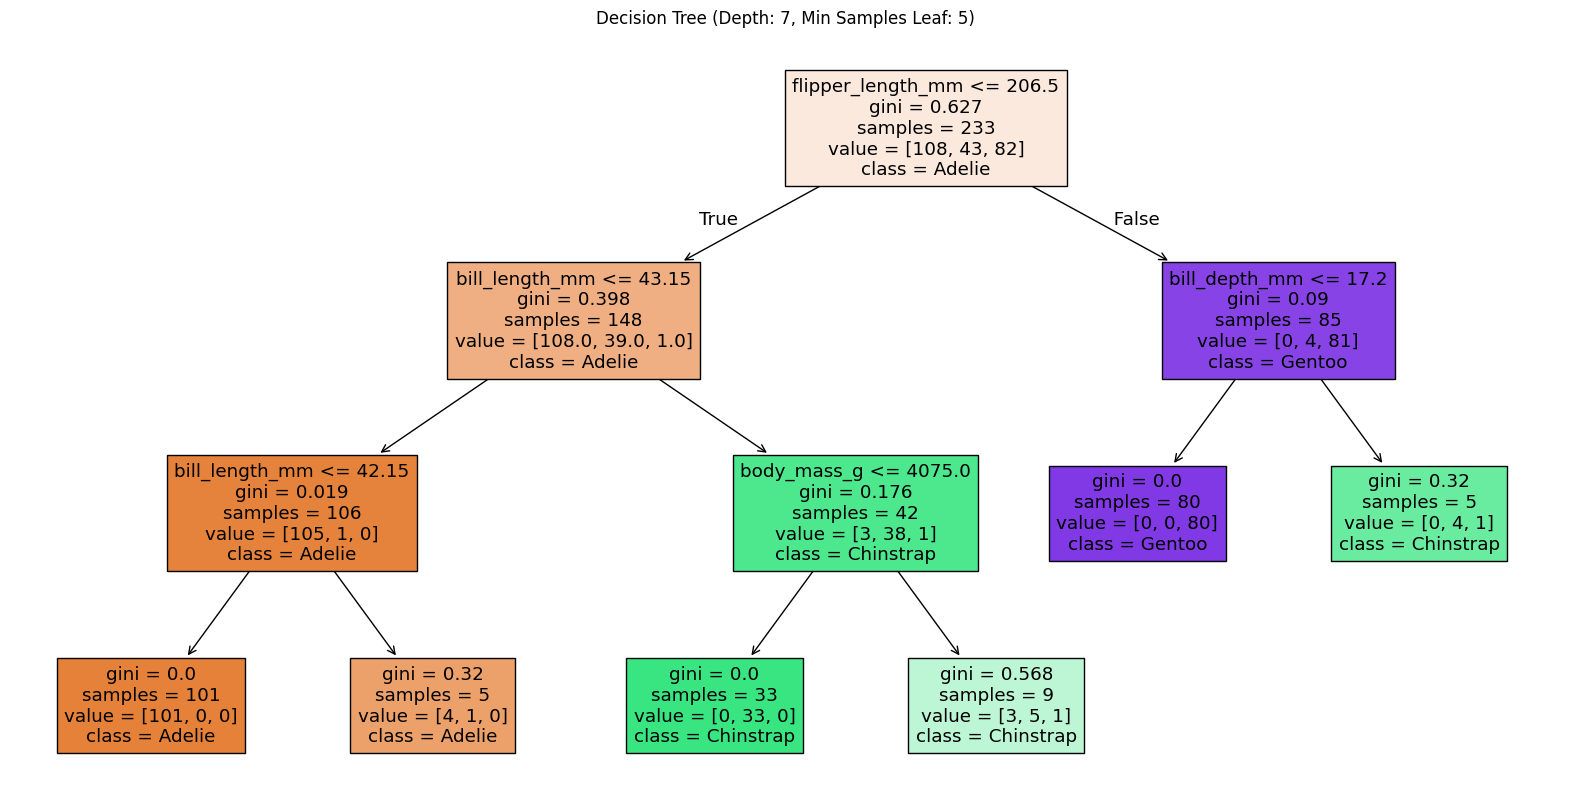

9. Results with max depth as 7 and least node size 10:
Training Accuracy: 0.9614, Test Accuracy: 0.9100


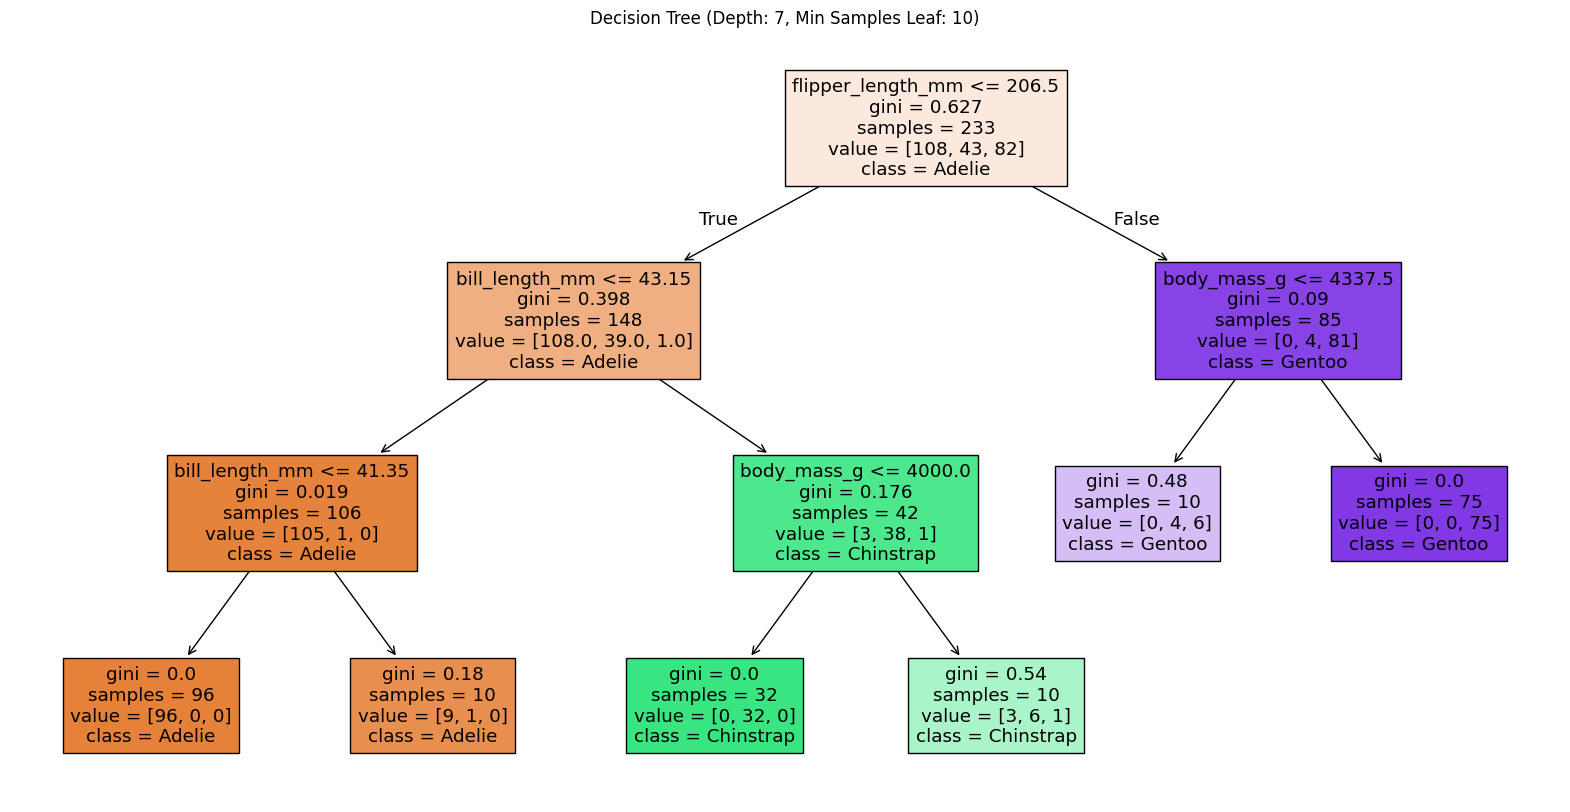

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Define depths and min_sample_leaf values
depth = [3, 5, 7]
min_samples_leaf = [1, 5, 10]

results = []
i = 1

print("Q2.1.3 Decision Tree:")  

for d in depth:
    for msl in min_samples_leaf:
        # Initialize the Decision Tree Classifier
        clf = DecisionTreeClassifier(max_depth=d, min_samples_leaf=msl, random_state=RANDOM_SEED)
        
        # Fit the model
        clf.fit(X_train, y_train)
        
        # Predict on training and testing data
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate accuracy scores
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Print accuracy scores
        print(f"{i}. Results with max depth as {d} and least node size {msl}:")
        print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        i += 1
        
        # Store the classification report
        report = classification_report(y_test, y_test_pred, target_names=species_encoder.classes_, output_dict=True)
        results.append({
            'depth': d,
            'min_samples_leaf': msl,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': report
        })
        
        # Plot the decision tree
        plt.figure(figsize=(20, 10))
        plot_tree(clf, feature_names=X.columns, class_names=species_encoder.classes_, filled=True)
        plt.title(f"Decision Tree (Depth: {d}, Min Samples Leaf: {msl})")
        plt.show()



### Bagging Trees
- with Decision Trees as the base method

In [7]:
from sklearn.ensemble import BaggingClassifier

j = 1
n_estimators = [10, 50, 100]

print("Q2.1.4 Bagging of Trees:")

for d in depth:
    for n_est in n_estimators:
        # Initialize the Decision Tree Classifier
        base_clf = DecisionTreeClassifier(max_depth=d,  random_state=RANDOM_SEED)
        
        # Initialize the Bagging Classifier with the Decision Tree as the base learner
        bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=n_est, random_state=RANDOM_SEED)
        
        # Fit the model
        bagging_clf.fit(X_train, y_train)
        
        # Predict on training and testing data
        y_train_pred = bagging_clf.predict(X_train)
        y_test_pred = bagging_clf.predict(X_test)
        
        # Calculate accuracy scores
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Print accuracy scores
        print(f"{j}. Results with max depth as {d} and number of trees {n_est}:")
        print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print("=====================================================================\n\n")
        j += 1
        
        # Store the classification report
        report = classification_report(y_test, y_test_pred, target_names=species_encoder.classes_, output_dict=True)
        results.append({
            'depth': d,
            'number of trees': n_est,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': report
        })

Q2.1.4 Bagging of Trees:
1. Results with max depth as 3 and number of trees 10:
Training Accuracy: 0.9914, Test Accuracy: 0.9500


2. Results with max depth as 3 and number of trees 50:
Training Accuracy: 0.9871, Test Accuracy: 0.9300


3. Results with max depth as 3 and number of trees 100:
Training Accuracy: 0.9914, Test Accuracy: 0.9300


4. Results with max depth as 5 and number of trees 10:
Training Accuracy: 1.0000, Test Accuracy: 0.9600


5. Results with max depth as 5 and number of trees 50:
Training Accuracy: 1.0000, Test Accuracy: 0.9600


6. Results with max depth as 5 and number of trees 100:
Training Accuracy: 1.0000, Test Accuracy: 0.9600


7. Results with max depth as 7 and number of trees 10:
Training Accuracy: 1.0000, Test Accuracy: 0.9600


8. Results with max depth as 7 and number of trees 50:
Training Accuracy: 1.0000, Test Accuracy: 0.9600


9. Results with max depth as 7 and number of trees 100:
Training Accuracy: 1.0000, Test Accuracy: 0.9600




### Random Forest
- using Decision tree as base learner

In [9]:
from sklearn.ensemble import RandomForestClassifier

k = 1

print("Q2.1.5 Random Forest:")

# Define min sample leaf, min sample split, max features
min_samp_leaf = 10
min_samp_split = 5
max_feat = 'sqrt'

for d in depth:
    for n_est in n_estimators:
        # Initialize the Random Forest Classifier
        rf_clf = RandomForestClassifier(max_depth=d, 
                                        n_estimators=n_est, 
                                        random_state=RANDOM_SEED,
                                        min_samples_leaf = min_samp_leaf,
                                        min_samples_split = min_samp_split,
                                        max_features = max_feat
                                        )
        
        # Fit the model
        rf_clf.fit(X_train, y_train)
        
        # Predict on training and testing data
        y_train_pred = rf_clf.predict(X_train)
        y_test_pred = rf_clf.predict(X_test)
        
        # Calculate accuracy scores
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Print accuracy scores
        print(f"{k}. Results with max depth as {d} and number of trees {n_est}:")
        print(f"Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
        print("=====================================================================\n\n")
        k += 1
        
        # Store the classification report
        report = classification_report(y_test, y_test_pred, target_names=species_encoder.classes_, output_dict=True)
        results.append({
            'depth': d,
            'number of trees': n_est,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'classification_report': report
        })

Q2.1.5 Random Forest:
1. Results with max depth as 3 and number of trees 10:
Training Accuracy: 0.9614, Test Accuracy: 0.9100


2. Results with max depth as 3 and number of trees 50:
Training Accuracy: 0.9828, Test Accuracy: 0.9300


3. Results with max depth as 3 and number of trees 100:
Training Accuracy: 0.9871, Test Accuracy: 0.9300


4. Results with max depth as 5 and number of trees 10:
Training Accuracy: 0.9657, Test Accuracy: 0.9300


5. Results with max depth as 5 and number of trees 50:
Training Accuracy: 0.9871, Test Accuracy: 0.9400


6. Results with max depth as 5 and number of trees 100:
Training Accuracy: 0.9871, Test Accuracy: 0.9300


7. Results with max depth as 7 and number of trees 10:
Training Accuracy: 0.9657, Test Accuracy: 0.9300


8. Results with max depth as 7 and number of trees 50:
Training Accuracy: 0.9871, Test Accuracy: 0.9400


9. Results with max depth as 7 and number of trees 100:
Training Accuracy: 0.9871, Test Accuracy: 0.9300




###  Relationship of Bias/Variance with respect to Number of Trees in Random Forests

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

# Define a new list for number of trees
n_trees = list(range(10, 101, 10))

# Initialize lists to store bias^2 and variance values
bias_squared = []
variance = []

# Loop through different number of trees
for n in n_trees:
    # Initialize the Random Forest Classifier
    rf_clf = RandomForestClassifier(max_depth=d, 
                                    n_estimators=n, 
                                    random_state=RANDOM_SEED,
                                    min_samples_leaf=min_samp_leaf,
                                    min_samples_split=min_samp_split,
                                    max_features=max_feat)
    
    # Perform bias-variance decomposition
    avg_expected_loss, avg_bias_squared, avg_variance = bias_variance_decomp(
        rf_clf, X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), 
        loss='0-1_loss', random_seed=RANDOM_SEED)
    
    # Store the results
    bias_squared.append(avg_bias_squared)
    variance.append(avg_variance)

# Print the results
print("Number of Trees vs Bias^2:")
for n, b in zip(n_trees, bias_squared):
    print(f"{n} trees: Bias^2 = {b:.4f}")

print("\nNumber of Trees vs Variance:")
for n, v in zip(n_trees, variance):
    print(f"{n} trees: Variance = {v:.4f}")

Number of Trees vs Bias^2:
10 trees: Bias^2 = 0.0700
20 trees: Bias^2 = 0.0700
30 trees: Bias^2 = 0.0700
40 trees: Bias^2 = 0.0700
50 trees: Bias^2 = 0.0700
60 trees: Bias^2 = 0.0700
70 trees: Bias^2 = 0.0700
80 trees: Bias^2 = 0.0700
90 trees: Bias^2 = 0.0700
100 trees: Bias^2 = 0.0700

Number of Trees vs Variance:
10 trees: Variance = 0.0297
20 trees: Variance = 0.0243
30 trees: Variance = 0.0233
40 trees: Variance = 0.0240
50 trees: Variance = 0.0203
60 trees: Variance = 0.0204
70 trees: Variance = 0.0209
80 trees: Variance = 0.0204
90 trees: Variance = 0.0197
100 trees: Variance = 0.0196


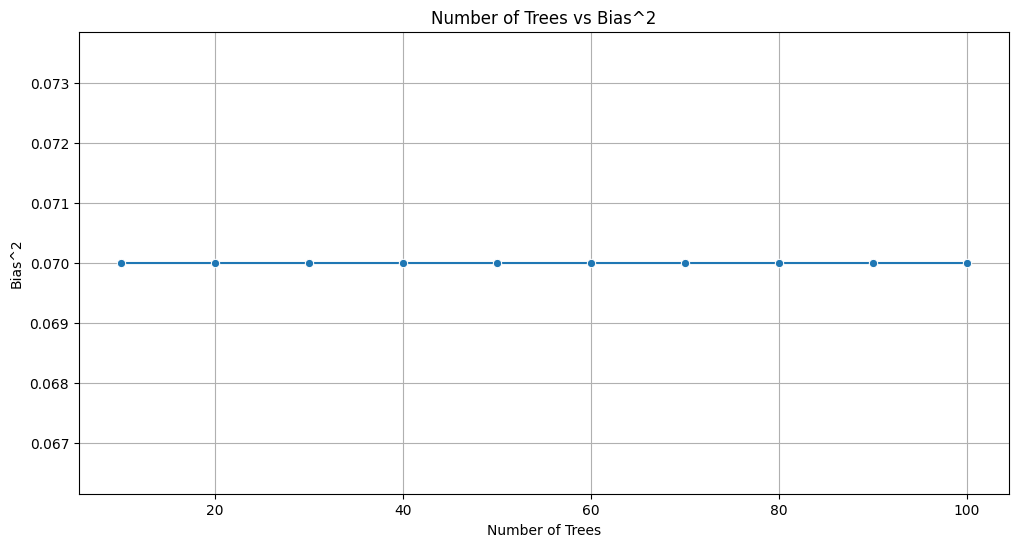

In [12]:
# plot the relationship between number of trees and bias^2 using sns
plt.figure(figsize=(12, 6))
sns.lineplot(x=n_trees, y=bias_squared, marker='o')
plt.title("Number of Trees vs Bias^2")
plt.xlabel("Number of Trees")
plt.ylabel("Bias^2")
plt.grid(True)
plt.show()


As the number of trees increases, the bias^2 remains constant, indicating that the increasing the number of trees in the model has no impact on the model's biasness

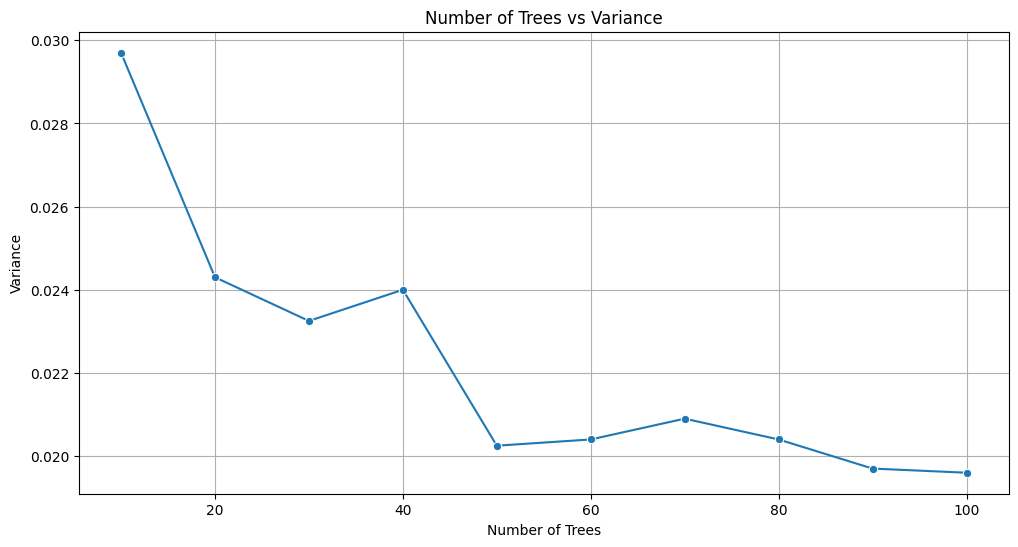

In [13]:
# Plot the relationship between number of trees and variance using sns
plt.figure(figsize=(12, 6))
sns.lineplot(x=n_trees, y=variance, marker='o')
plt.title("Number of Trees vs Variance")
plt.xlabel("Number of Trees")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

On the other hand, the variance initially decreases with the number of trees added but eventually stabilizes, indicating that the model's predictions become more consistent with more trees added, but at a certain threshold of trees added, there is diminishing returns in reducing variance of the model's output.